# Classificação de músicas do Spotify 

### Sobre a base de dados: 
Este é um conjunto de dados de faixas do Spotify em uma variedade de 125 gêneros diferentes. Cada faixa possui alguns recursos de áudio associados a ela.

### Uso da base: 
O conjunto de dados pode ser usado para:
* Construindo um sistema de recomendação com base em alguma entrada ou preferência do usuário
* Finalidades de classificação com base em recursos de áudio e gêneros disponíveis
* Qualquer outro aplicativo que você possa imaginar. Sinta-se à vontade para discutir!

### Objetivo do nosso projeto: 
Este notebook contempla a criação de um **modelo preditivo para classificar músicas lentas e agitadas** utilizando a base de dados "Spotify Tracks Dataset" do Kaggle.

In [1]:
import kagglehub

path = kagglehub.dataset_download("maharshipandya/-spotify-tracks-dataset")

print(f"Path to dataset files:", path)

c:\Users\leuci\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\leuci\.cache\kagglehub\datasets\maharshipandya\-spotify-tracks-dataset\versions\1


In [2]:
import pandas as pd

df = pd.read_csv(path + "/dataset.csv")

In [3]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
df.shape

(114000, 21)

### Criando a variável target 

De acordo com a regra de negócio, a coluna valence é uma medida de **0,0 a 1,0** que **descreve a positividade musical transmitida por uma faixa**. Faixas com **alta valência soam mais positivas** (por exemplo, feliz, alegre, eufórica), enquanto faixas com **baixa valência soam mais negativas** (por exemplo, triste, deprimida, irritada). Para criar a nossa coluna alvo do modelo preditivo, vamos utilizar a coluna "valence" para ser nosso critério de músicas agitadas ou lentas.


Analisando o gráfico, há uma distribuição de dados concentrada em valence entre 0.3 e 0.4, temous uma curva decrescente na distribuição de dados de valences maiores que 0.5, indicando que há uma grande quantidade de registros de músicas de estilos mais melancólicos ou suaves.

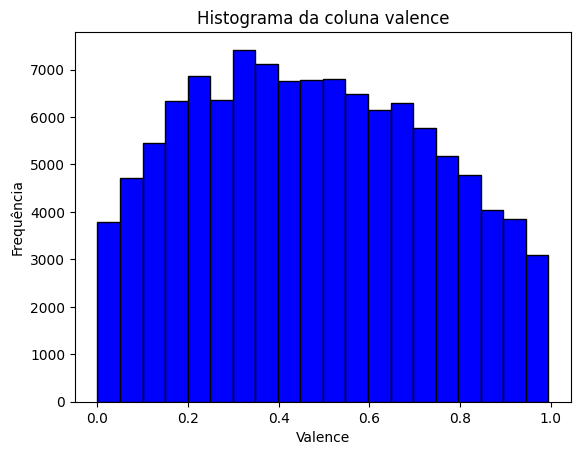

In [5]:
import matplotlib.pyplot as plt

plt.hist(df['valence'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Valence')
plt.ylabel('Frequência')
plt.title('Histograma da coluna valence')
plt.show()

> "A **média** de valência é de aproximadamente **0.47**, valor muito próximo à mediana (50%), o que indica uma distribuição simétrica dos dados. O **desvio padrão** de **0.25** mostra que, em média, as músicas variam 0.25 pontos para cima ou para baixo em relação à média.
>
> O valor **mínimo** é **zero**, confirmando a presença de faixas com características menos 'positivas'. Analisando os quartis:
> * **1º Quartil (25%):** 25% das músicas têm valência igual ou inferior a **0.26**.
> * **2º Quartil (50%):** Metade da base possui valência de até **0.46**.
> * **3º Quartil (75%):** 75% das músicas têm valência igual ou inferior a **0.68**.
>
> O valor **máximo** de **0.99** está dentro de uma faixa esperada em relação ao terceiro quartil, sugerindo, à primeira vista, a ausência de *outliers* extremos."


In [6]:
df['valence'].describe()

count    114000.000000
mean          0.474068
std           0.259261
min           0.000000
25%           0.260000
50%           0.464000
75%           0.683000
max           0.995000
Name: valence, dtype: float64

In [7]:
def categoriar_valence(row):
    if row['valence'] > 0.5:
        return 'agitada'
    else:
        return 'lenta' 
    

#Crie a nova coluna 'target' usando a função categorizar_valence
df['target'] = df.apply(categoriar_valence, axis=1) # axis=1 aplica a função linha por linha
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,target
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,agitada
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,lenta
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,lenta
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,lenta
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,lenta


In [8]:
df.tail()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,target
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.235,...,1,0.0422,0.640,0.928,0.0863,0.0339,125.995,5,world-music,lenta
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.117,...,0,0.0401,0.994,0.976,0.1050,0.0350,85.239,4,world-music,lenta
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.329,...,0,0.0420,0.867,0.000,0.0839,0.7430,132.378,4,world-music,agitada
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.506,...,1,0.0297,0.381,0.000,0.2700,0.4130,135.960,4,world-music,lenta
113999,113999,2hETkH7cOfqmz3LqZDHZf5,Cesária Evora,Miss Perfumado,Barbincor,22,241826,False,0.526,0.487,...,0,0.0725,0.681,0.000,0.0893,0.7080,79.198,4,world-music,agitada


### Feature Engineering

Como próximo passo, vamos armazenar em um novo dataframe apenas as colunas necessárias para nossa classificação de músicas

In [9]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre', 'target'],
      dtype='object')

In [10]:
df_musica = df.drop(['Unnamed: 0', 'track_id'], axis=1)
df_musica.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,target
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,agitada
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,lenta
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,lenta
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,lenta
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,lenta


### Tratando os dados categóricos 

**LabelEncoder:** Essa classe é utilizada para codificar rótulos de classes em **números inteiros**. É frequentemente usado quando se trabalha com algoritmos de **aprendizado supervisionado** que requerem rótulos numéricos.

---

**Dica rápida:** Você sabia que existe uma diferença importante entre usar o `LabelEncoder` e o `OneHotEncoder`? O LabelEncoder cria uma ordem (0, 1, 2...) que pode confundir alguns algoritmos, fazendo-os achar que o valor 2 é "maior" ou "melhor" que o 1.

In [11]:
def label_encoder_dataframe(df, colums_to_encode):
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()

    for column in colums_to_encode:
        if column in df.columns:
            df[column] = le.fit_transform(df[column])
        else: 
            print(f"A lista possui colunas que não existem no dataframe")
 
    
    return df 
    

colunas_a_codificar = ['artists', 'album_name', 'track_name', 'explicit', 'track_genre', 'target']
label_encoder_dataframe(df_musica, colunas_a_codificar)
df_musica.head()


,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,target
0,10357,8100,11741,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,0,0
1,3287,14796,22528,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,0,1
2,12397,39162,60774,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,0,1
3,14839,8580,9580,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,0,1
4,5255,16899,25689,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,0,1


### Analisando as variáveis que vão compor o modelo

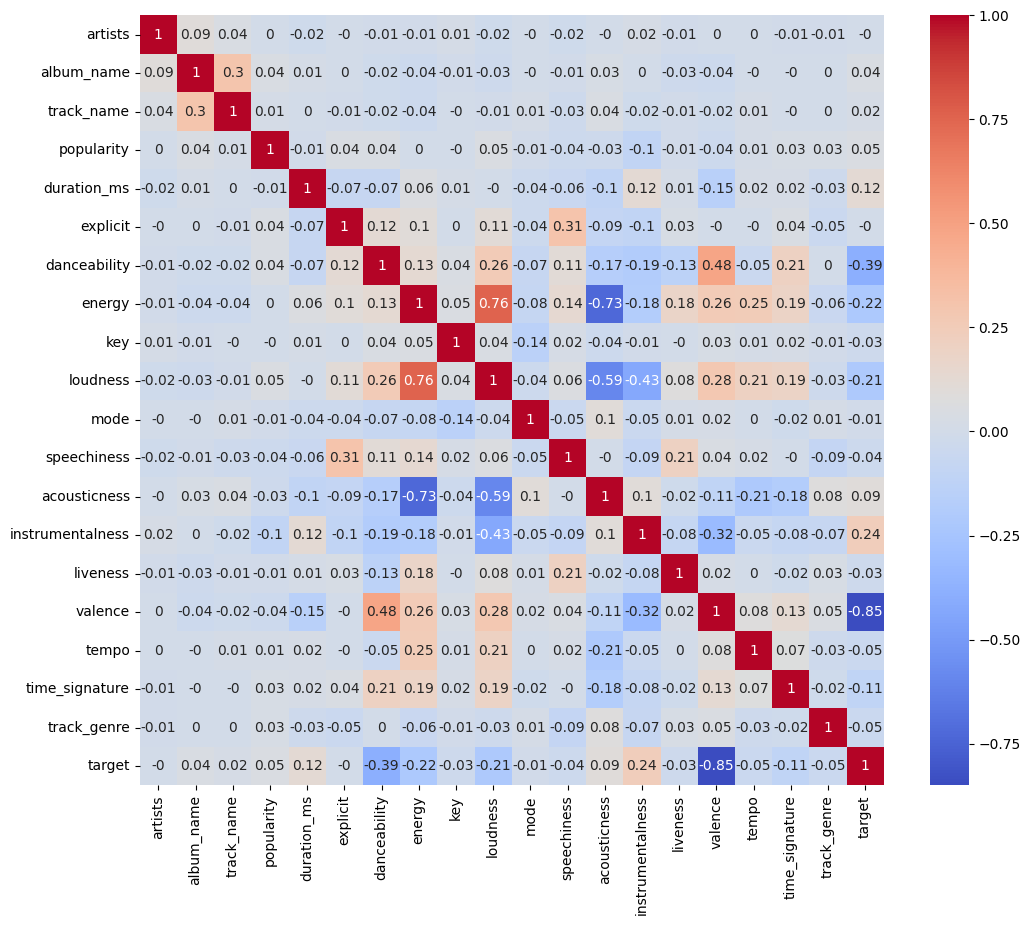

In [12]:
import seaborn as sns

correlation_matrix = df_musica.corr().round(2)

fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(data=correlation_matrix, annot=True, ax=ax, cmap='coolwarm');

### Entendendo o equilíbrio do target

In [13]:
#verificando o equilíbrio das classes
round(df_musica['target'].value_counts(normalize=True)*100, 2)

target
1    54.37
0    45.63
Name: proportion, dtype: float64

### Separando os dados em treino e teste

In [14]:
df_musica.columns

Index(['artists', 'album_name', 'track_name', 'popularity', 'duration_ms',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre', 'target'],
      dtype='object')

### Parâmetros do `train_test_split`

* **`stratify=y` (Estratificação):**
    * **O que faz:** Garante que a proporção das classes (ex: 70% agitadas / 30% lentas) seja mantida identicamente nos conjuntos de treino e teste.
    * **Importância:** Fundamental para **bases desbalanceadas**, evitando que o modelo treine ou seja testado apenas com um tipo de dado por azar.

* **`random_state=7` (Reprodutibilidade):**
    * **O que faz:** Fixa a "semente" da aleatoriedade. O número (7, 42, etc.) funciona como uma chave para travar o sorteio.
    * **Importância:** Garante que, toda vez que você rodar o código, a divisão dos dados seja **exatamente a mesma**. Sem isso, seus resultados mudariam a cada execução, dificultando a comparação de melhorias no modelo.

***

In [15]:
#separando os dados em treino e teste
from sklearn.model_selection import train_test_split

X = df_musica[['popularity', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'acousticness', 'instrumentalness', 'liveness', 'track_genre']]
y = df_musica['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=7)

In [16]:
print(X_train.shape, X_test.shape)

(91200, 10) (22800, 10)


### Normalizando os dados 

Ao aplicar o **MinMaxScaler**, todos os valores dos dados serão transformados para o intervalo entre **0 e 1**, onde o valor mínimo será 0 e o valor máximo será 1. Essa técnica é especialmente útil quando os algoritmos de aprendizado de máquina são **sensíveis à escala dos dados**.

**Por que aplicamos a normalização dos dados com as bases já separadas em treino e teste? 🤔**

Se aplicarmos normalizações antes de dividir em conjuntos de treino e teste, podemos acabar introduzindo informações do conjunto de teste no conjunto de treino. Isso pode levar a uma **avaliação otimista do desempenho do modelo**, uma vez que o modelo terá visto parte dos dados de teste durante o treinamento. Este tipo de problema também é chamado de **Data Leak (vazamento de dados)**.

***

In [17]:
from sklearn.preprocessing import MinMaxScaler

#criar uma instância do MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train) 

X_train_escalonado = scaler.transform(X_train)
X_test_escalonado = scaler.transform(X_test)


### Criando uma função para executar modelos de machine learning 

Vamos criar uma função que vai executar o modelo preditivo e avaliar a sua performance utilizando as principais métricas de validação.

***



# 📘 Documentação: Função `roda_modelo`

Esta função foi projetada para automatizar o ciclo de **treinamento, avaliação e visualização** de modelos de Machine Learning. Abaixo está a explicação detalhada de cada bloco de código.

### 1\. Definição e Importações 📦

```python
def roda_modelo(modelo):
    from sklearn.metrics import roc_curve, roc_auc_score, classification_report
```

  * **O que faz:**
      * Define a função aceitando um `modelo` genérico como argumento (pode ser Random Forest, Regressão Logística, etc.).
      * Importa as ferramentas de métrica do Scikit-Learn apenas quando a função é chamada.
  * **Por que:**
      * Torna o código reutilizável. Você não precisa reescrever o código de avaliação para cada algoritmo que testar. As importações dentro da função mantêm o escopo organizado.

-----

### 2\. Treinamento do Modelo (O Aprendizado) 🧠

```python
    modelo.fit(X_train_escalonado, y_train)
```

  * **O que faz:**
      * Executa o método `.fit()`, que é o comando para o modelo "estudar". Ele analisa os padrões nos dados de treino (`X`) e suas respectivas respostas corretas (`y`).
  * **Por que:**
      * É a etapa fundamental. Sem o `.fit()`, o modelo é apenas uma "caixa vazia" matemática sem nenhum conhecimento sobre o problema (músicas lentas vs. agitadas).

-----

### 3\. Cálculo de Probabilidades e AUC (A Confiança) 📊

```python
    prob_predic = modelo.predict_proba(X_test_escalonado)
    auc = roc_auc_score(y_test, prob_predic[:, 1])
    print(f"AUC {auc}")
```

  * **O que faz:**
      * `.predict_proba()`: Em vez de apenas classificar (0 ou 1), calcula a **probabilidade** (ex: 0.85 de chance de ser agitada).
      * `[:, 1]`: Seleciona apenas a probabilidade da classe positiva (1 - Agitada).
      * `roc_auc_score`: Calcula a nota geral do modelo baseada nessas probabilidades.
  * **Por que:**
      * A métrica **AUC** (Área Sob a Curva) é excelente para comparar modelos. Ela diz o quão bem o modelo consegue distinguir entre as duas classes, independentemente do "ponto de corte" (threshold) escolhido.

-----

### 4\. Relatório de Classificação (O Boletim) 📝

```python
    predicao = modelo.predict(X_test_escalonado)
    print("\nClassification Report:\n")
    print(classification_report(y_test, predicao))
```

  * **O que faz:**
      * `.predict()`: O modelo toma a decisão final (transforma a probabilidade em 0 ou 1 usando o corte padrão de 50%).
      * `classification_report`: Gera uma tabela com Acurácia, Precisão, Recall e F1-Score.
  * **Por que:**
      * O AUC é um número resumo, mas o **Classification Report** dá os detalhes. Ele mostra se o modelo está errando mais em uma classe específica (ex: acerta muito as agitadas, mas confunde as lentas).

-----

### 5\. Configuração da Curva ROC 📈

```python
    y_pred_probs = modelo.predict_proba(X_test_escalonado)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
```

  * **O que faz:**
      * Calcula as coordenadas matemáticas (X e Y) necessárias para desenhar o gráfico.
      * `fpr`: Taxa de Falsos Positivos (Eixo X).
      * `tpr`: Taxa de Verdadeiros Positivos (Eixo Y).
  * **Por que:**
      * Prepara os dados para a visualização gráfica, permitindo entender o trade-off entre acertar muito e cometer alarmes falsos.

-----

### 6\. Plotagem do Gráfico (Visualização) 🎨

```python
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('Taxa de falso positivo')
    plt.ylabel('Taxa de verdadeiro positivo')
    plt.title('Curva ROC')
    plt.legend()
    plt.show()
```

  * **O que faz:**
      * Desenha a curva de desempenho do modelo (Azul).
      * Desenha a linha de base aleatória (Cinza tracejada).
  * **Por que:**
      * **Diagnóstico Visual:** Se a linha azul estiver muito próxima da cinza, o modelo é ruim (aleatório). Se estiver curvada para o canto superior esquerdo, o modelo é bom. Ajuda a apresentar os resultados para pessoas não-técnicas.

-----

### 7\. Conversão Manual (Código Extra) ⚠️

```python
    y_pred = (y_pred_probs > 0.5).astype(int)
```

  * **O que faz:**
      * Transforma manualmente as probabilidades em inteiros (0 ou 1) usando a lógica: "Se for maior que 0.5, vira 1".
  * **Por que:**
      * Nesta função específica, essa linha serve para demonstrar como o método `.predict()` funciona "por baixo dos panos". Embora não esteja sendo impressa, ela ilustra a lógica do limiar de decisão (threshold).

-----

**Dica de Uso:**
Para usar essa função, basta ter um modelo instanciado e rodar:

```python
# Exemplo
rf_model = RandomForestClassifier()
roda_modelo(rf_model)
```

In [18]:
def roda_modelo(modelo):
    # Importa as métricas necessárias apenas quando a função é chamada
    from sklearn.metrics import roc_curve, roc_auc_score, classification_report

    # --- 1. FASE DE APRENDIZADO ---
    # O modelo "estuda" os dados de treino escalonados (X) e suas respostas (y)
    modelo.fit(X_train_escalonado, y_train)

    # --- 2. FASE DE PROBABILIDADES (CONFIANÇA) ---
    # Calcula a matriz de probabilidades: Coluna 0 (Chance de Agitada) e Coluna 1 (Chance de Lenta)
    prob_predic = modelo.predict_proba(X_test_escalonado) 
    
    # Calcula a nota AUC comparando o Gabarito (y_test) com a probabilidade de ser Lenta (Coluna 1)
    auc = roc_auc_score(y_test, prob_predic[:, 1]) 
    print(f"AUC {auc}")

    # --- 3. FASE DE CLASSIFICAÇÃO (DECISÃO) ---
    # O modelo decide se é 0 ou 1 (Corte padrão de 50%). Se > 0.5 vira 1 (Lenta), senão 0 (Agitada)
    predicao = modelo.predict(X_test_escalonado)
    
    print("\nClassification Report:\n")
    # Imprime o "Boletim Escolar" com Precisão, Recall e F1-Score
    print(classification_report(y_test, predicao))

    # --- 4. FASE GRÁFICA (CURVA ROC) ---
    print("\nRoc Curve\n")
    
    # Isola novamente apenas as probabilidades da classe 1 (Lenta) para montar o gráfico
    y_pred_probs = modelo.predict_proba(X_test_escalonado)[:, 1]

    # Calcula os pontos matemáticos (X e Y) necessários para desenhar a linha azul do gráfico
    #thresholds é A função testa o  modelo variando a exigência. Cenário A: "Só vou dizer que é Lenta se tiver 90% de certeza" (Régua alta). Cenário B: "Vou dizer que é Lenta se tiver 10% de certeza" (Régua baixa).
    #tpr é a taxa de acertos reais (verdadeiros positivos) do modelo para cada cenário, ou seja, a sensibilidade do modelo.
    #fpr é a taxa de alarmes falsos (falsos positivos) do modelo para cada cenário.
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

    # Cria o quadro em branco para o desenho (tamanho 8x6)
    plt.figure(figsize=(8, 6))
    
    # Desenha a linha azul do seu modelo e coloca a nota AUC na legenda
    plt.plot(fpr, tpr, color = 'blue', label=f'ROC curve (AUC = {auc:.2f})') 
    
    # Desenha a linha cinza tracejada no meio (representa um chute aleatório/sorte)
    plt.plot([0,1], [0, 1], color='gray', linestyle='--') # Linha diagonal
    
    # Nomeia o eixo X (Taxa de Falsos Positivos - Alarmes Falsos)
    plt.xlabel('Taxa de falso positivo')
    
    # Nomeia o eixo Y (Taxa de Verdadeiros Positivos - Acertos Reais)
    plt.ylabel('Taxa de verdadeiro positivo')
    
    # Coloca o título no topo do gráfico
    plt.title('Curva ROC')
    
    # Mostra a legenda (o quadradinho explicando o que é a linha azul)
    plt.legend()
    
    # Exibe o gráfico final na tela
    plt.show()
    
    # --- 5. CONVERSÃO MANUAL (EXTRA) ---
    # Transforma manualmente a probabilidade em 0 ou 1 (Se > 50% vira 1, senão 0).
    # Nota: Esta variável 'y_pred' é calculada mas não está sendo retornada ou usada depois aqui.
    y_pred = (y_pred_probs > 0.5).astype(int)

### Regressão logística 📈

O modelo se baseia em uma **função logística**, que transforma as variáveis independentes em uma **probabilidade entre 0 e 1**. Para novas entradas de dados, o modelo calcula a **probabilidade do evento binário ocorrer**.

-----

Esse relatório é o **"Boletim Escolar Detalhado"** do modelo. Diferente da Acurácia (que é apenas a nota final), aqui você vê exatamente onde o modelo é bom e onde ele tem dificuldade.

Vamos traduzir coluna por coluna, usando o seu cenário:
* **0 (Agitada)**
* **1 (Lenta)**

---

### 1. Precision (Precisão) - "O Atirador de Elite" 🎯
Responde à pergunta: **"De todas as vezes que o modelo chutou essa classe, quantas vezes ele acertou?"**

* **Para a Classe 0 (0.70):** Toda vez que o modelo diz *"Isso é uma música Agitada"*, ele está certo **70%** das vezes. (30% das vezes ele se enganou e era lenta).
* **Para a Classe 1 (0.74):** Toda vez que ele diz *"Isso é uma música Lenta"*, ele acerta **74%** das vezes.
* **Conclusão:** O modelo é um pouco mais confiável quando diz que a música é **Lenta**.

### 2. Recall (Revocação) - "A Rede de Pesca" 🕸️
Responde à pergunta: **"De todas as músicas desse tipo que existiam na prova, quantas o modelo conseguiu encontrar?"**

* **Para a Classe 0 (0.69):** De todas as músicas Agitadas que existiam no teste, o modelo só conseguiu capturar **69%**. As outras 31% ele "deixou escapar" (classificou errado como lentas).
* **Para a Classe 1 (0.75):** De todas as músicas Lentas que existiam, o modelo encontrou **75%**.
* **Conclusão:** O modelo tem mais facilidade em **encontrar** as músicas lentas do que as agitadas.

### 3. F1-Score (Média Harmônica) - "O Equilíbrio" ⚖️
É uma média entre a Precisão e o Recall. É a métrica mais importante quando você quer um resumo único.

* Se a Precisão for alta e o Recall for baixo (ou vice-versa), o F1-Score cai.
* Como seus valores (0.69 e 0.75) estão próximos da Precisão e Recall, indica que o modelo é **consistente**, ele não está "roubando" para um lado só.

### 4. Support (Quantidade Real) 🔢
É simplesmente a contagem de músicas usadas no teste.
* Havia **10.403** músicas Agitadas (0).
* Havia **12.397** músicas Lentas (1).
* **Total:** 22.800 músicas no teste.
* *Nota:* Como os números são parecidos, sua base está balanceada, o que é ótimo!

---

### As Médias (Linhas de baixo)

* **Accuracy (0.72):** De todas as 22.800 músicas, o modelo acertou o rótulo de **72%** delas. É uma nota "OK", passou de ano, mas tem espaço para melhorar.
* **Macro avg:** Soma as notas das duas classes e divide por 2. (Trata as classes como iguais).
* **Weighted avg:** Faz a média ponderada pelo **Support**. Como a classe 1 tem mais músicas (12 mil vs 10 mil), ela tem um peso um pouco maior nessa nota final.


### Resumo do seu modelo:
Ele é um modelo "nota 7". Ele é ligeiramente melhor em identificar **músicas lentas (1)** do que agitadas.

O gráfico mostra o preço que você paga para acertar mais.

Início da Curva (Canto inferior esquerdo): A linha azul sobe rápido. Isso significa que o modelo é muito bom em pegar as músicas "fáceis" (aquelas obviamente lentas) sem cometer erros (sem dar alarme falso).

Meio da Curva: Para tentar capturar as músicas mais difíceis (aquelas que ficam no meio termo), o modelo começa a errar um pouco mais (a linha vai indo para a direita).

AUC 0.7961701081333914

Classification Report:

              precision    recall  f1-score   support

           0       0.70      0.69      0.69     10403
           1       0.74      0.75      0.75     12397

    accuracy                           0.72     22800
   macro avg       0.72      0.72      0.72     22800
weighted avg       0.72      0.72      0.72     22800


Roc Curve



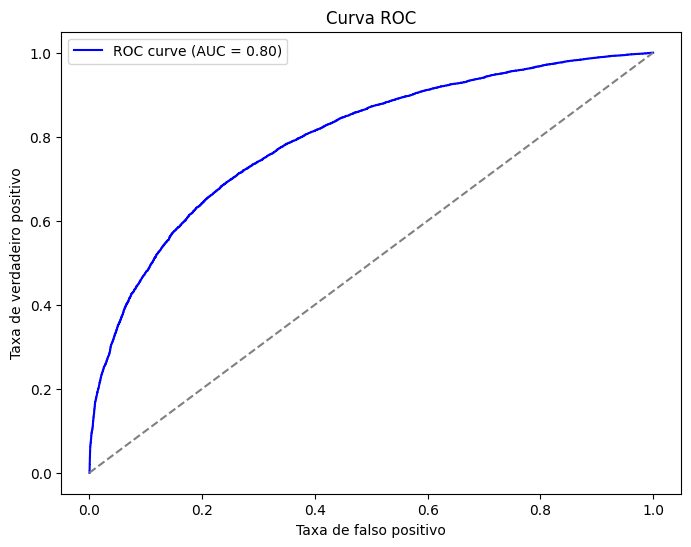

In [19]:
from sklearn.linear_model import LogisticRegression
modelo_logistico = LogisticRegression()
roda_modelo(modelo_logistico)


### KNN (K-Nearest Neighbors) 📍

Para um novo ponto de dados, o KNN identifica os **K pontos mais próximos (vizinhos)** no conjunto de treinamento. A classe do novo ponto é a classe mais frequente entre os K vizinhos.

-----

### 💡 A Analogia Perfeita: "Diga-me com quem andas..."

O KNN funciona exatamente como o ditado popular: *"Diga-me com quem andas e te direi quem és"*.

Imagine o seu gráfico de músicas:

1.  O algoritmo pega a música nova que você quer classificar.
2.  Ele olha para as **5 músicas (K=5)** mais parecidas que já estão no gráfico (as vizinhas).
3.  Se 4 vizinhas são "Agitadas" e 1 é "Lenta", ele conclui: "Essa música nova também deve ser **Agitada**".



Olhe para a coluna **Support** (quantidade de músicas):
* **Classe 0:** Tem 10.403 músicas.
* **Classe 1:** Tem 12.397 músicas.
* **Total:** 22.800 músicas.

A Classe 1 é maior (representa cerca de 54% dos dados), então a nota dela "puxa" a média para cima com mais força.

**Exemplo com a Precisão (Precision):**

1.  **Macro Avg:** $(0.73 + 0.76) \div 2 = \mathbf{0.745}$ (arredonda para 0.75).
    * *Aqui ele ignora que a classe 1 é maior.*

2.  **Weighted Avg:** Ele faz uma conta proporcional:
    * Pega a nota da Classe 0 (0.73) vezes o peso dela (10 mil).
    * Soma com a nota da Classe 1 (0.76) vezes o peso dela (12 mil).
    * Divide tudo pelo total (22 mil).
    * **Resultado:** Como a classe 1 (que tirou 0.76) tem mais alunos, a média final fica um pouquinho mais "garantida" em **0.75**.

AUC 0.8056474477833462

Classification Report:

              precision    recall  f1-score   support

           0       0.73      0.71      0.72     10403
           1       0.76      0.78      0.77     12397

    accuracy                           0.75     22800
   macro avg       0.74      0.74      0.74     22800
weighted avg       0.75      0.75      0.75     22800


Roc Curve



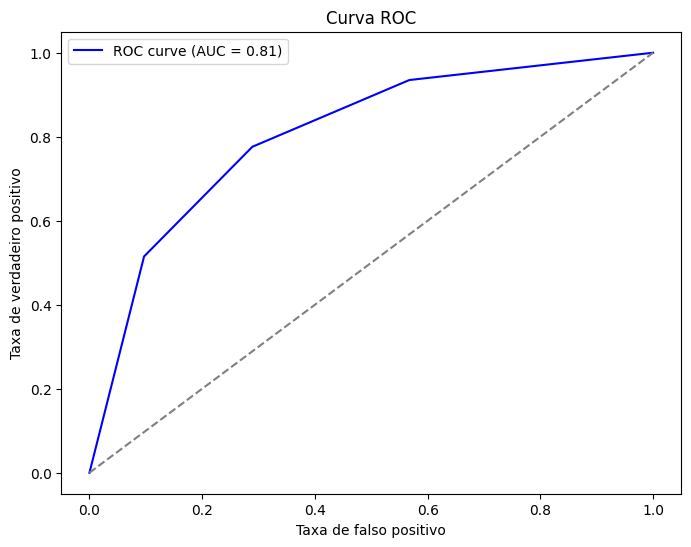

In [21]:
from sklearn.neighbors import KNeighborsClassifier
modelo_knn = KNeighborsClassifier(n_neighbors=3)
roda_modelo(modelo=modelo_knn)

### Random Florest

O Random Forest Classifier é um algoritmo de **ensemble learning**, que **combina vários modelos para melhorar a performance**. O modelo cria uma floresta de árvores de decisão, onde cada árvore é treinada em um subconjunto aleatório dos dados (bootstrap). A classe final do novo ponto de dados é a classe mais votada pelas árvores da floresta.

AUC 0.809763858597419

Classification Report:

              precision    recall  f1-score   support

           0       0.72      0.67      0.70     10403
           1       0.74      0.78      0.76     12397

    accuracy                           0.73     22800
   macro avg       0.73      0.73      0.73     22800
weighted avg       0.73      0.73      0.73     22800


Roc Curve



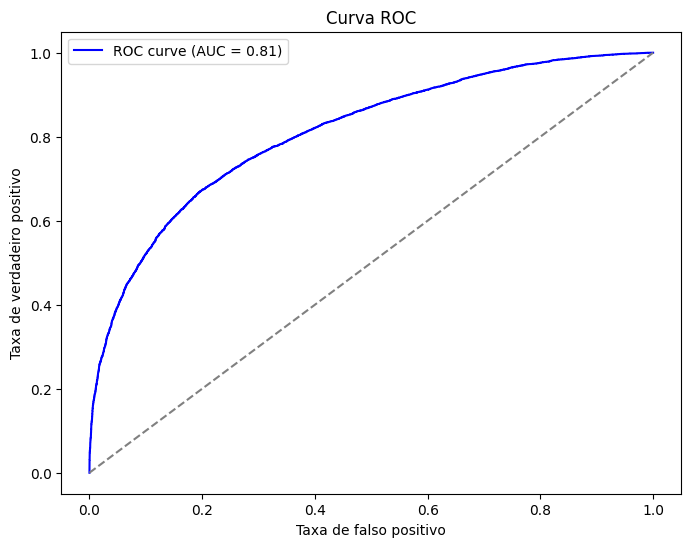

In [22]:
from sklearn.ensemble import RandomForestClassifier
modelo_random_forest = RandomForestClassifier(max_depth=5, n_estimators=100)
roda_modelo(modelo=modelo_random_forest)

### Testando novos parâmentros com Grid Search

### Otimização via Grid Search

O **Grid Search** é utilizado para descobrir qual combinação de `n_estimators` (número de árvores) e `max_depth` (profundidade máxima) torna o modelo `RandomForestClassifier` o melhor possível para classificar seus dados.

O processo utiliza a métrica **F1-Score** como o critério principal para definir a "melhor" performance.




### 1. A Fórmula
Matematicamente, a média harmônica entre Precisão ($P$) e Revocação ($R$) é calculada assim:

$$F1 = 2 \times \frac{P \times R}{P + R}$$

### 2. Por que não usar a Média Aritmética?
Imagine que você tem um modelo que chuta que **tudo** é fraude (no caso de detecção de fraudes).
* Sua **Revocação** seria 100% (você pegou todas as fraudes).
* Sua **Precisão** seria péssima, digamos 10% (você acusou muita gente inocente).

Se fizéssemos uma média aritmética simples: $\frac{100 + 10}{2} = 55\%$.
O número $55\%$ parece razoável, mas o modelo é inútil na prática.

### 3. O "Efeito Gravitacional" da Média Harmônica
A média harmônica tem uma propriedade especial: ela sempre será puxada para baixo pelo **menor número**.



Usando o mesmo exemplo acima no cálculo harmônico:
$$2 \times \frac{100 \times 10}{100 + 10} \approx 18\%$$

Perceba a diferença?
* Média Aritmética: **55%** (Ilusória)
* Média Harmônica (F1): **18%** (Realista)

### Resumo
A média harmônica funciona garantindo o **equilíbrio**. Para ter um F1-Score alto, você é **obrigado** a ter tanto a Precisão quanto a Revocação altas simultaneamente. Se uma delas cair, ela arrasta a pontuação inteira para o chão.


In [24]:
# Importa a classe GridSearchCV, que é a ferramenta que realiza a busca em grade.
from sklearn.model_selection import GridSearchCV
# É necessário importar também o RandomForestClassifier para usá-lo.
from sklearn.ensemble import RandomForestClassifier

# 1. DEFINE A GRADE DE PARÂMETROS
# Aqui você cria um dicionário onde as chaves são os nomes dos hiperparâmetros
# que você quer testar no modelo (ex: 'n_estimators') e os valores são listas
# com os valores que você quer que o Grid Search teste.
param_grid = {
    'n_estimators': [100, 200, 300],  # Testa com 100, 200 e 300 árvores.
    'max_depth': [5, 10, 15]          # Testa com profundidade máxima de 5, 10 e 15.
}
# O Grid Search testará todas as 9 combinações (3x3) possíveis.
# Ex: (n_estimators=100, max_depth=5), (n_estimators=100, max_depth=10), etc.

# 2. CRIA A INSTÂNCIA DO GRIDSEARCH
# Aqui você configura o processo de busca.
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(), # O modelo que será otimizado.
    param_grid=param_grid,              # A grade de parâmetros que definimos acima.
    cv=5,                               # 'cv' é de Cross-Validation (Validação Cruzada). O valor 5
                                        # significa que os dados de treino serão divididos em 5 partes.
                                        # O modelo treina com 4 e testa com 1, repetindo isso 5x para
                                        # cada combinação de parâmetros. Isso torna a avaliação mais robusta.
    scoring='f1',                       # A métrica que será usada para decidir qual combinação é a melhor.
                                        # 'f1' (F1-Score) é uma boa métrica para classificação.
    n_jobs=1                            # Número de processadores a serem usados. -1 usaria todos os disponíveis,
                                        # acelerando o processo. 1 usa apenas um.
)

# 3. EXECUTA A BUSCA (AJUSTE)
# Esta é a linha mais importante e demorada. O Grid Search vai agora treinar e avaliar
# o RandomForestClassifier para cada uma das 9 combinações de parâmetros, usando a
# validação cruzada de 5 partes. (Total de 9 * 5 = 45 treinamentos!)
grid_search.fit(X_train_escalonado, y_train)

# 4. OBTÉM OS MELHORES PARÂMETROS
# Após a conclusão da busca, o objeto 'grid_search' armazena os resultados.
# A propriedade '.best_params_' retorna um dicionário com a combinação que
# obteve o maior 'f1-score' durante a validação cruzada.
rf_params = grid_search.best_params_

# Imprime na tela qual foi a melhor combinação encontrada.
print("Melhores parâmetros:", rf_params)

Melhores parâmetros: {'max_depth': 15, 'n_estimators': 200}


### Testando com os melhores parametros encontrados.

AUC 0.9054084033673653

Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.80      0.80     10403
           1       0.84      0.84      0.84     12397

    accuracy                           0.82     22800
   macro avg       0.82      0.82      0.82     22800
weighted avg       0.82      0.82      0.82     22800


Roc Curve



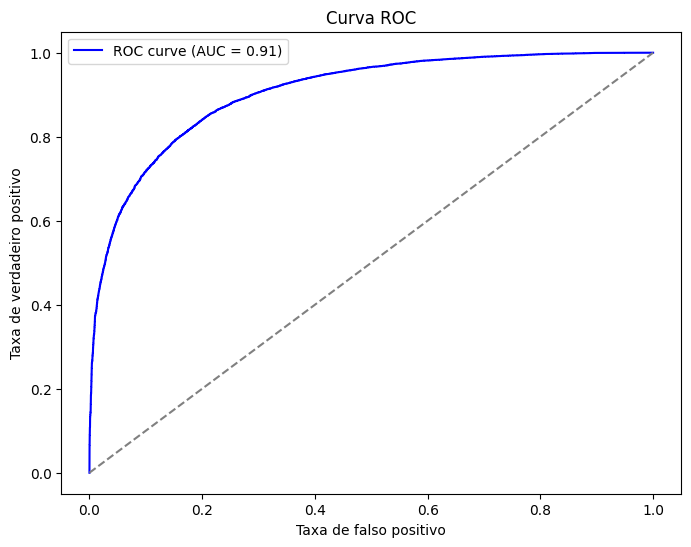

In [26]:
from sklearn.ensemble import RandomForestClassifier
modelo_random_forest_gs = RandomForestClassifier(max_depth=15, n_estimators=200)
roda_modelo(modelo_random_forest_gs)

### Testando o modelo:

In [ ]:
import numpy as np

novos_dados = pd.read_excel('novos_dados.xlsx')
base_original = pd.read_excel('novos_dados.xlsx')

# Codifique a coluna categórica
coluna = ['track_genre']
label_encoder_dataframe(novos_dados, coluna)

# Garante que a coluna 'key' exista
if 'key' not in novos_dados.columns:
    # Defina um valor padrão, por exemplo 0
    novos_dados['key'] = 0

# Selecione apenas as colunas usadas no modelo
colunas_modelo = ['popularity', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 
                  'acousticness', 'instrumentalness', 'liveness', 'track_genre']
novos_dados_modelo = novos_dados[colunas_modelo]

# Aplique o scaler
novos_dados_modelo = scaler.transform(novos_dados_modelo)

# Previsão
previsoes = modelo_random_forest_gs.predict(novos_dados_modelo)

def mapear_valor(valores):
    resultados = []
    for valor in valores:
        if valor == 0:
            resultados.append('Música agitada')
        elif valor == 1:
            resultados.append('Música lenta')
        else:
            resultados.append('Desconhecido')
    return np.array(resultados)

base_original['target'] = mapear_valor(previsoes)
base_original.head()

,popularity,duration_ms,danceability,energy,loudness,acousticness,instrumentalness,liveness,track_genre,target
0,80,200000,0.89,0.8,-19333,0.0555,0.976,0.45,rock,Música agitada
1,30,205000,0.20,0.5,-11773,0.0100,0.452,0.20,folk,Música lenta
